# Task2
Create a K-means clustering algorithm to group customers of a retail store based on their purchase history using the "Mall_Customers.csv" file.

## Load the data

Load the `Mall_Customers.csv` dataset into a pandas DataFrame.


In [1]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data preprocessing

Select the relevant features for clustering (e.g., Annual Income and Spending Score) and handle any missing values if necessary.


In [2]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(X.isnull().sum())

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Determine the optimal number of clusters

Use methods like the elbow method or silhouette score to find the optimal number of clusters for the K-means algorithm.


**My Option**:
Implemented the elbow method to find the optimal number of clusters by calculating inertia for a range of cluster numbers and plotting the results.



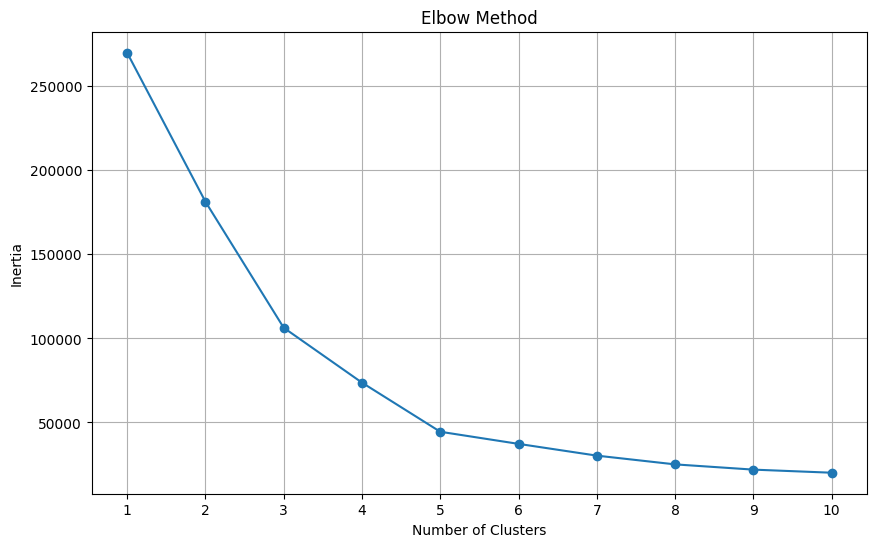

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Apply k-means clustering

Apply the K-means algorithm with the optimal number of clusters to segment the customers.


In [4]:
from sklearn.cluster import KMeans

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(X)
df['Cluster'] = kmeans.predict(X)
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Visualize the clusters

Visualize the clusters using scatter plots to interpret the results.


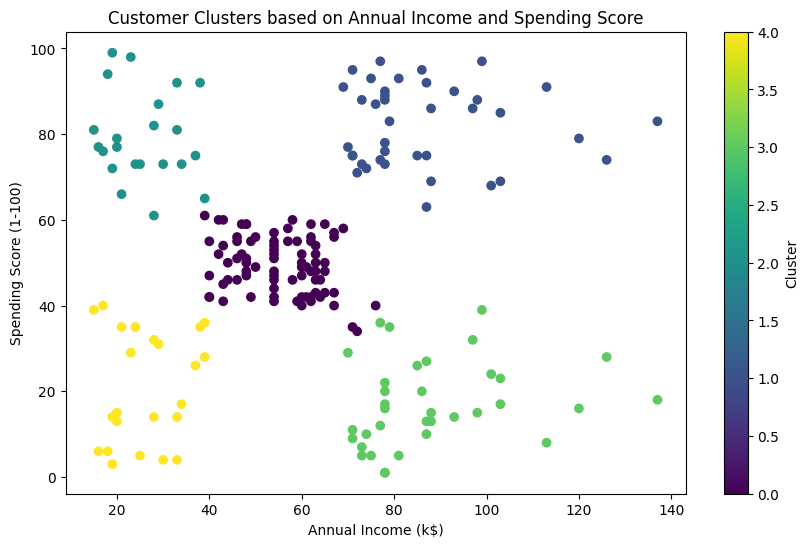

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', label=df['Cluster'])
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

## Predict and visualize a new data point

Now, let's add code to predict the cluster of a new data point provided by the user and visualize it within the existing clusters.

Enter Annual Income (k$): 120
Enter Spending Score (1-100): 30
The new data point belongs to Cluster: 3


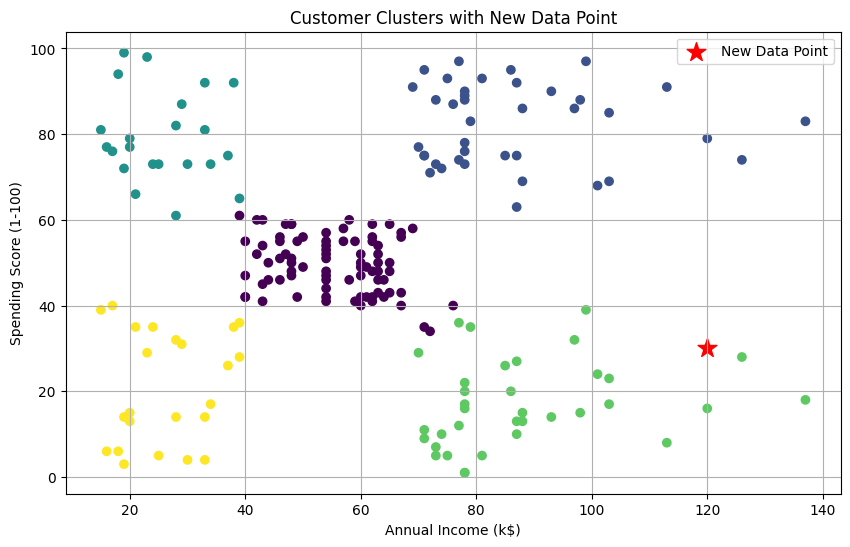

In [6]:
# Get user input for a new data point
annual_income = float(input("Enter Annual Income (k$): "))
spending_score = float(input("Enter Spending Score (1-100): "))

# Create a DataFrame for the new data point
new_data_point = pd.DataFrame([[annual_income, spending_score]], columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Predict the cluster for the new data point
predicted_cluster = kmeans.predict(new_data_point)
print(f"The new data point belongs to Cluster: {predicted_cluster[0]}")

# Append the new data point to the original DataFrame with its predicted cluster
new_data_point['Cluster'] = predicted_cluster[0]
df_with_new = pd.concat([df, new_data_point], ignore_index=True)

# Visualize the clusters including the new data point
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_with_new['Annual Income (k$)'], df_with_new['Spending Score (1-100)'], c=df_with_new['Cluster'], cmap='viridis')

# Highlight the new data point with a different marker/color
plt.scatter(new_data_point['Annual Income (k$)'], new_data_point['Spending Score (1-100)'], color='red', marker='*', s=200, label='New Data Point')

plt.title('Customer Clusters with New Data Point')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()